Importing police station coordinate and crime data, merging into a single dataframe, correcting duplicate crimes types used and doing some basic exploratory plots and analysis.

In [54]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [55]:
os.chdir("C:\\Users\\Nicola Breedt Local\\Documents\\DATA SCIENCE\\My Data Projects\\SA Crime\\saps data _station_boundaries_points_converted")

In [56]:
#Importing police station coordinate data
Station_coord = pd.read_csv("Police_points.csv")

In [57]:
Station_coord.head()

,X,Y,COMPNT_NM,LOCATION_X,LOCATION_Y,CREATE_DT,VERSION
0,26.71606,-29.23620,BOTSHABELO,26.71606,-29.23620,20180306,1.2.3
1,27.62384,-32.56819,KHUBUSIDRIFT,27.62384,-32.56819,20180306,1.2.3
2,27.42741,-32.57118,STUTTERHEIM,27.42741,-32.57118,20180306,1.2.3
3,25.58419,-33.79664,MOTHERWELL,25.58419,-33.79664,20180306,1.2.3
4,25.52347,-33.84109,KWADWESI,25.52347,-33.84109,20180306,1.2.3


In [58]:
Station_coord = Station_coord[['COMPNT_NM', 'LOCATION_X', 'LOCATION_Y']]

In [59]:
Station_coord.head()

,COMPNT_NM,LOCATION_X,LOCATION_Y
0,BOTSHABELO,26.71606,-29.23620
1,KHUBUSIDRIFT,27.62384,-32.56819
2,STUTTERHEIM,27.42741,-32.57118
3,MOTHERWELL,25.58419,-33.79664
4,KWADWESI,25.52347,-33.84109


In [60]:
Station_coord.rename(columns={'COMPNT_NM':'POLICE_STATION'}, inplace = True) 

In [61]:
Station_coord.head()

,POLICE_STATION,LOCATION_X,LOCATION_Y
0,BOTSHABELO,26.71606,-29.23620
1,KHUBUSIDRIFT,27.62384,-32.56819
2,STUTTERHEIM,27.42741,-32.57118
3,MOTHERWELL,25.58419,-33.79664
4,KWADWESI,25.52347,-33.84109


In [62]:
#Importing Crime Data
Crime_Data = pd.read_csv("openup_org-Police_Statistics___2005_-_2018.csv")

In [63]:
Crime_Data.head()

,Police Station,Province,Crime,Year,Incidents
0,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2005-2006,6692.0
1,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2006-2007,6341.0
2,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2007-2008,5966.0
3,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2008-2009,5187.0
4,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2009-2010,4985.0


In [64]:
Crime_Data.columns

Index(['Police Station', 'Province', 'Crime', 'Year', 'Incidents'], dtype='object')

In [65]:
Crime_Data.rename(columns = {'Police Station':'POLICE_STATION', 'Province': 'PROVINCE', 'Crime':'CRIME', 'Year':'YEAR', 'Incidents':'INCIDENTS'}, inplace = True)

In [66]:
Crime_Data = Crime_Data.apply(lambda x: x.astype(str).str.upper())

In [67]:
Crime_Data.head()

,POLICE_STATION,PROVINCE,CRIME,YEAR,INCIDENTS
0,CAPE TOWN CENTRAL,WESTERN CAPE,ALL THEFT NOT MENTIONED ELSEWHERE,2005-2006,6692.0
1,CAPE TOWN CENTRAL,WESTERN CAPE,ALL THEFT NOT MENTIONED ELSEWHERE,2006-2007,6341.0
2,CAPE TOWN CENTRAL,WESTERN CAPE,ALL THEFT NOT MENTIONED ELSEWHERE,2007-2008,5966.0
3,CAPE TOWN CENTRAL,WESTERN CAPE,ALL THEFT NOT MENTIONED ELSEWHERE,2008-2009,5187.0
4,CAPE TOWN CENTRAL,WESTERN CAPE,ALL THEFT NOT MENTIONED ELSEWHERE,2009-2010,4985.0


In [68]:
CrimeByStation = pd.merge(Station_coord, Crime_Data, on = ["POLICE_STATION","POLICE_STATION"])

In [69]:
CrimeByStation.head()

,POLICE_STATION,LOCATION_X,LOCATION_Y,PROVINCE,CRIME,YEAR,INCIDENTS
0,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2005-2006,376.0
1,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2006-2007,359.0
2,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2007-2008,401.0
3,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2008-2009,474.0
4,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2009-2010,351.0


In [70]:
CrimeByStation['CRIME'].unique()

array(['ALL THEFT NOT MENTIONED ELSEWHERE', 'ARSON',
       'ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BODILY HARM',
       'ATTEMPTED MURDER', 'ATTEMPTED SEXUAL OFFENCES',
       'BURGLARY AT NON-RESIDENTIAL PREMISES',
       'BURGLARY AT RESIDENTIAL PREMISES', 'CARJACKING',
       'COMMERCIAL CRIME', 'COMMON ASSAULT', 'COMMON ROBBERY',
       'CONTACT SEXUAL OFFENCES',
       'DRIVING UNDER THE INFLUENCE OF ALCOHOL OR DRUGS',
       'DRUG-RELATED CRIME',
       'ILLEGAL POSSESSION OF FIREARMS AND AMMUNITION',
       'MALICIOUS DAMAGE TO PROPERTY', 'MURDER', 'RAPE',
       'ROBBERY AT NON-RESIDENTIAL PREMISES',
       'ROBBERY AT RESIDENTIAL PREMISES',
       'ROBBERY WITH AGGRAVATING CIRCUMSTANCES', 'SEXUAL ASSAULT',
       'SEXUAL OFFENCES DETECTED AS A RESULT OF POLICE ACTION',
       'SHOPLIFTING', 'STOCK-THEFT',
       'THEFT OF MOTOR VEHICLE AND MOTORCYCLE',
       'THEFT OUT OF OR FROM MOTOR VEHICLE', 'TRUCK HIJACKING',
       'SEXUAL OFFENCES', 'CONTACT CRIME', 'CONTACT RELA

In [71]:
#Replacing CRIME with common names throughout
CrimeByStation.replace({'CRIME':{'17  COMMUNITY REPORTED SERIOUS CRIMES':'17 COMMUNITY REPORTED SERIOUS CRIMES',
                                                      'CONTACT CRIMES':'CONTACT CRIME',
                                                      'CONTACT-RELATED CRIMES':'CONTACT RELATED CRIME',
                                                      'PROPERTY-RELATED CRIMES':'PROPERTY RELATED CRIME',
                                                      'CRIME DETECTED AS A RESULT OF POLICE ACTION':'CRIMES DETECTED AS A RESULT OF POLICE ACTION',
                                                      'OTHER SERIOUS CRIME':'OTHER SERIOUS CRIMES'}}, inplace = True)

In [72]:
CrimeByStation['CRIME'].unique()

array(['ALL THEFT NOT MENTIONED ELSEWHERE', 'ARSON',
       'ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BODILY HARM',
       'ATTEMPTED MURDER', 'ATTEMPTED SEXUAL OFFENCES',
       'BURGLARY AT NON-RESIDENTIAL PREMISES',
       'BURGLARY AT RESIDENTIAL PREMISES', 'CARJACKING',
       'COMMERCIAL CRIME', 'COMMON ASSAULT', 'COMMON ROBBERY',
       'CONTACT SEXUAL OFFENCES',
       'DRIVING UNDER THE INFLUENCE OF ALCOHOL OR DRUGS',
       'DRUG-RELATED CRIME',
       'ILLEGAL POSSESSION OF FIREARMS AND AMMUNITION',
       'MALICIOUS DAMAGE TO PROPERTY', 'MURDER', 'RAPE',
       'ROBBERY AT NON-RESIDENTIAL PREMISES',
       'ROBBERY AT RESIDENTIAL PREMISES',
       'ROBBERY WITH AGGRAVATING CIRCUMSTANCES', 'SEXUAL ASSAULT',
       'SEXUAL OFFENCES DETECTED AS A RESULT OF POLICE ACTION',
       'SHOPLIFTING', 'STOCK-THEFT',
       'THEFT OF MOTOR VEHICLE AND MOTORCYCLE',
       'THEFT OUT OF OR FROM MOTOR VEHICLE', 'TRUCK HIJACKING',
       'SEXUAL OFFENCES', 'CONTACT CRIME', 'CONTACT RELA

In [73]:
#Changing INCIDENT data to float
CrimeByStation.INCIDENTS = CrimeByStation.INCIDENTS.astype(float)
CrimeByStation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565440 entries, 0 to 565439
Data columns (total 7 columns):
POLICE_STATION    565440 non-null object
LOCATION_X        565440 non-null float64
LOCATION_Y        565440 non-null float64
PROVINCE          565440 non-null object
CRIME             565440 non-null object
YEAR              565440 non-null object
INCIDENTS         551712 non-null float64
dtypes: float64(3), object(4)
memory usage: 34.5+ MB


In [74]:
#Saving file to csv
CrimeByStation.to_csv("CrimeByStation.csv", index = False)

In [75]:
#COMPARING CHANGE OVER TIME
#Creating a dataframe for first years data
CrimeByStation_F = CrimeByStation[CrimeByStation.YEAR == "2005-2006"]
CrimeByStation_F.head()

,POLICE_STATION,LOCATION_X,LOCATION_Y,PROVINCE,CRIME,YEAR,INCIDENTS
0,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2005-2006,376.0
12,BOTSHABELO,26.71606,-29.2362,FREE STATE,ARSON,2005-2006,4.0
24,BOTSHABELO,26.71606,-29.2362,FREE STATE,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,2005-2006,649.0
36,BOTSHABELO,26.71606,-29.2362,FREE STATE,ATTEMPTED MURDER,2005-2006,20.0
48,BOTSHABELO,26.71606,-29.2362,FREE STATE,ATTEMPTED SEXUAL OFFENCES,2005-2006,NaN


In [76]:
##Creating a dataframe for last years data
CrimeByStation_L = CrimeByStation[CrimeByStation.YEAR == "2016-2017"]
CrimeByStation_L.head()

,POLICE_STATION,LOCATION_X,LOCATION_Y,PROVINCE,CRIME,YEAR,INCIDENTS
11,BOTSHABELO,26.71606,-29.2362,FREE STATE,ALL THEFT NOT MENTIONED ELSEWHERE,2016-2017,304.0
23,BOTSHABELO,26.71606,-29.2362,FREE STATE,ARSON,2016-2017,3.0
35,BOTSHABELO,26.71606,-29.2362,FREE STATE,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,2016-2017,460.0
47,BOTSHABELO,26.71606,-29.2362,FREE STATE,ATTEMPTED MURDER,2016-2017,20.0
59,BOTSHABELO,26.71606,-29.2362,FREE STATE,ATTEMPTED SEXUAL OFFENCES,2016-2017,3.0


In [77]:
#Getting totals for each crime type
CrimeByStation_F = CrimeByStation_F.groupby(by = 'CRIME', as_index = False).agg({'INCIDENTS':'sum'})
CrimeByStation_F.head()

,CRIME,INCIDENTS
0,17 COMMUNITY REPORTED SERIOUS CRIMES,1939766.0
1,ALL THEFT NOT MENTIONED ELSEWHERE,424690.0
2,ARSON,7247.0
3,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,225659.0
4,ATTEMPTED MURDER,20369.0


In [78]:
CrimeByStation_L = CrimeByStation_L.groupby(by = 'CRIME', as_index = False).agg({'INCIDENTS':'sum'})
CrimeByStation_L.head()

,CRIME,INCIDENTS
0,17 COMMUNITY REPORTED SERIOUS CRIMES,1738980.0
1,ALL THEFT NOT MENTIONED ELSEWHERE,328272.0
2,ARSON,4321.0
3,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,170616.0
4,ATTEMPTED MURDER,18205.0


In [79]:
#Merging dataframes
CrimeByStation_Diff = pd.merge(CrimeByStation_F, CrimeByStation_L, on = ['CRIME', 'CRIME'])
CrimeByStation_Diff.rename(columns = {'INCIDENTS_x':'2005-2006', 'INCIDENTS_y':'2016-2017'}, inplace = True)
CrimeByStation_Diff.head()

,CRIME,2005-2006,2016-2017
0,17 COMMUNITY REPORTED SERIOUS CRIMES,1939766.0,1738980.0
1,ALL THEFT NOT MENTIONED ELSEWHERE,424690.0,328272.0
2,ARSON,7247.0,4321.0
3,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,225659.0,170616.0
4,ATTEMPTED MURDER,20369.0,18205.0


In [84]:
#Calculating difference and creating a dummy column for plotting
CrimeByStation_Diff['DIFFERENCE'] = CrimeByStation_Diff['2016-2017'] - CrimeByStation_Diff['2005-2006']
CrimeByStation_Diff['POSITIVE'] = CrimeByStation_Diff['DIFFERENCE'] > 0
CrimeByStation_Diff.sort_values('DIFFERENCE', inplace = True)
CrimeByStation_Diff.head()

,CRIME,2005-2006,2016-2017,DIFFERENCE,POSITIVE
0,17 COMMUNITY REPORTED SERIOUS CRIMES,1939766.0,1738980.0,-200786.0,False
1,ALL THEFT NOT MENTIONED ELSEWHERE,424690.0,328272.0,-96418.0,False
13,CONTACT CRIME,683382.0,608321.0,-75061.0,False
22,OTHER SERIOUS CRIMES,541034.0,469276.0,-71758.0,False
11,COMMON ASSAULT,225436.0,156450.0,-68986.0,False


Text(0, 0.5, 'Crime')

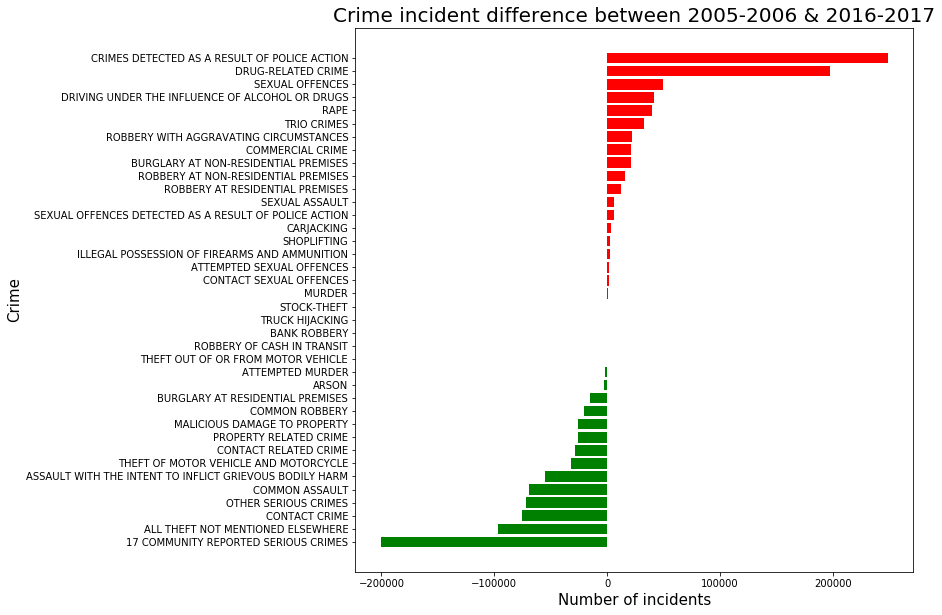

In [85]:
plt.rcParams['figure.figsize'] = 10,10
plt.barh(width = CrimeByStation_Diff["DIFFERENCE"], y = CrimeByStation_Diff["CRIME"], color = CrimeByStation_Diff.POSITIVE.map({True: 'r', False: 'g'}))
plt.title("Crime incident difference between 2005-2006 & 2016-2017", fontsize = 20)
plt.xlabel("Number of incidents", fontsize = 15)
plt.ylabel("Crime", fontsize = 15)

In [86]:
#Plotting incidents by year (with line to indicate mean number of incidents)
CrimeByStation_Yr = CrimeByStation.groupby(by = 'YEAR', as_index = False).agg({'INCIDENTS':'sum'})
CrimeByStation_Yr['POSITIVE'] = CrimeByStation_Yr['INCIDENTS'] > CrimeByStation_Yr['INCIDENTS'].mean()
CrimeByStation_Yr.head()

,YEAR,INCIDENTS,POSITIVE
0,2005-2006,6157481.0,True
1,2006-2007,6031253.0,False
2,2007-2008,5817279.0,False
3,2008-2009,6197010.0,True
4,2009-2010,6240403.0,True


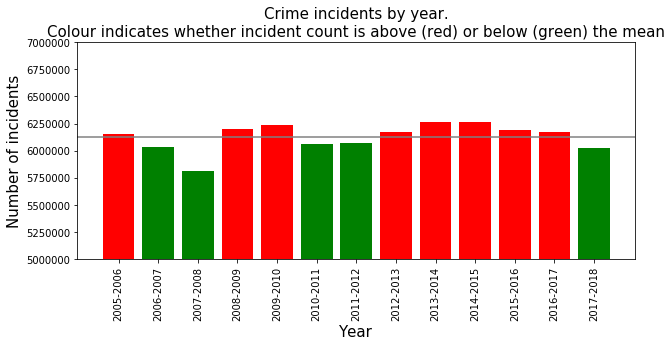

In [87]:
plt.rcParams['figure.figsize'] = 10,4
plt.bar(height = CrimeByStation_Yr["INCIDENTS"], x = CrimeByStation_Yr['YEAR'], color = CrimeByStation_Yr.POSITIVE.map({True: 'r', False: 'g'}))
plt.title("Crime incidents by year.\nColour indicates whether incident count is above (red) or below (green) the mean", fontsize = 15)
plt.xticks(rotation = 90)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of incidents", fontsize = 15)
plt.ylim(5000000, 7000000)
plt.axhline(CrimeByStation_Yr['INCIDENTS'].mean(), color="gray")

In [88]:
#Plotting by CRIME type to evaluate change over time for individual crime categories
Years = CrimeByStation['YEAR'].unique()
Crimes = CrimeByStation['CRIME'].unique()

ALL THEFT NOT MENTIONED ELSEWHERE


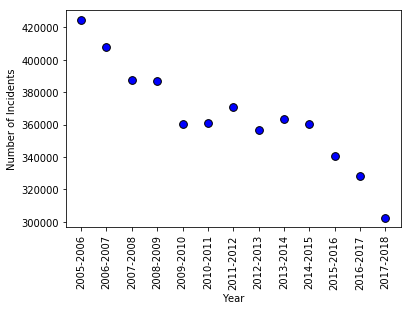

ARSON


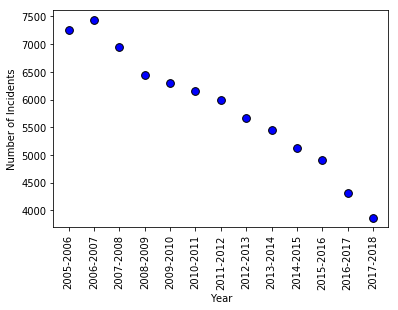

ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BODILY HARM


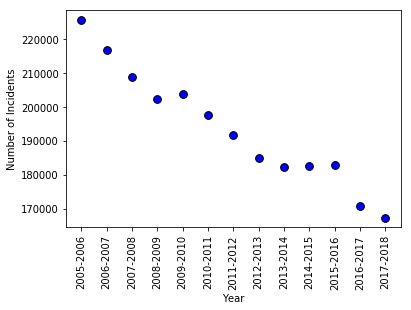

ATTEMPTED MURDER


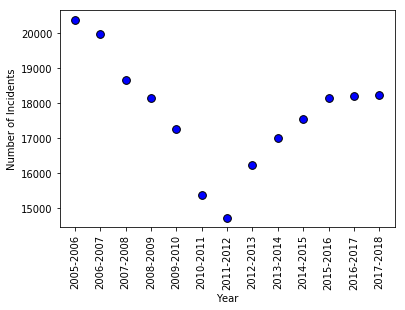

ATTEMPTED SEXUAL OFFENCES


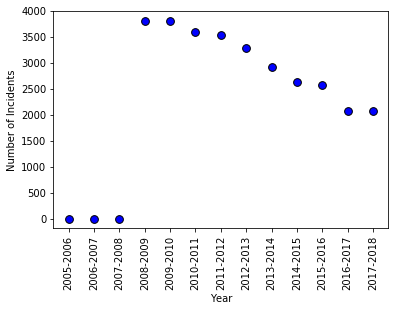

BURGLARY AT NON-RESIDENTIAL PREMISES


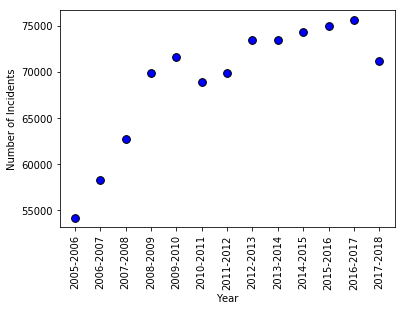

BURGLARY AT RESIDENTIAL PREMISES


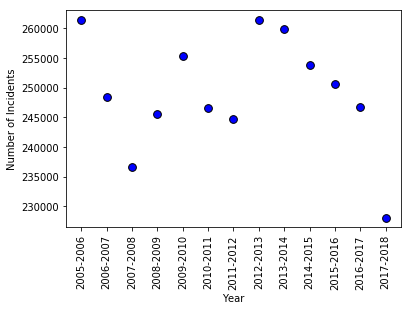

CARJACKING


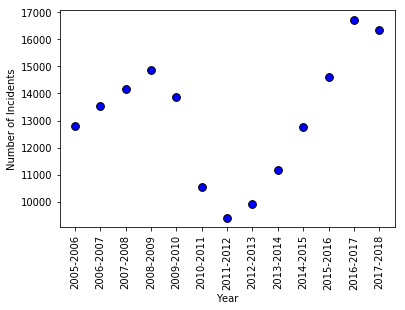

COMMERCIAL CRIME


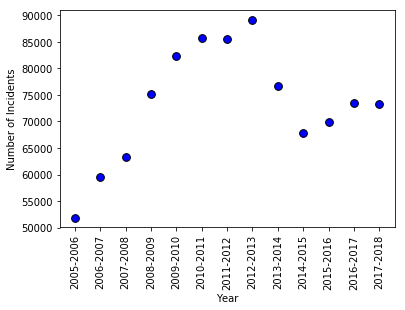

COMMON ASSAULT


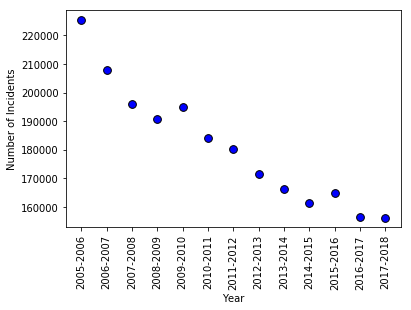

COMMON ROBBERY


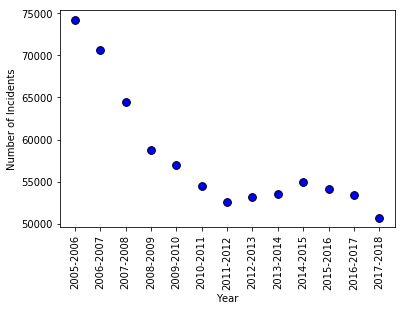

CONTACT SEXUAL OFFENCES


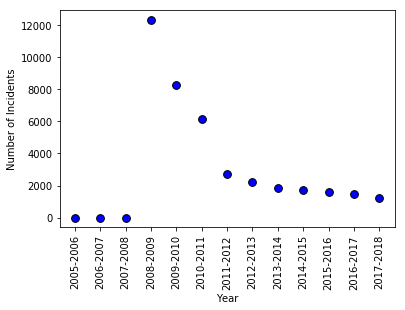

DRIVING UNDER THE INFLUENCE OF ALCOHOL OR DRUGS


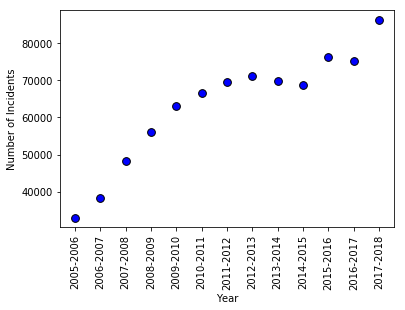

DRUG-RELATED CRIME


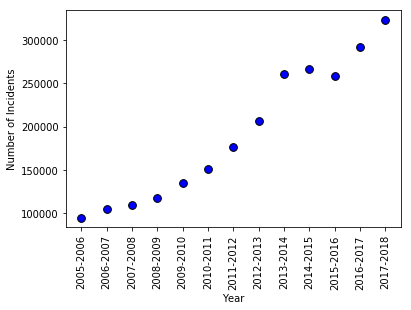

ILLEGAL POSSESSION OF FIREARMS AND AMMUNITION


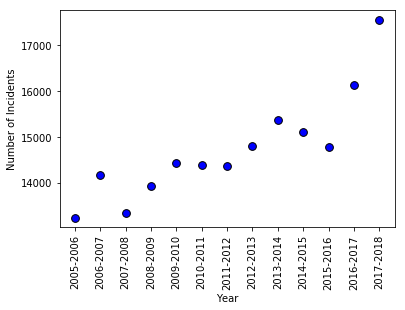

MALICIOUS DAMAGE TO PROPERTY


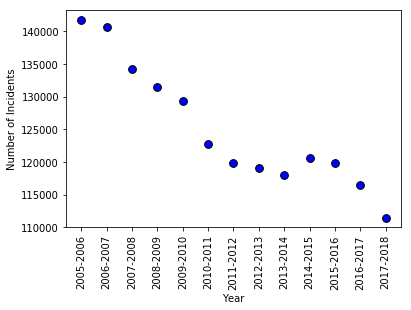

MURDER


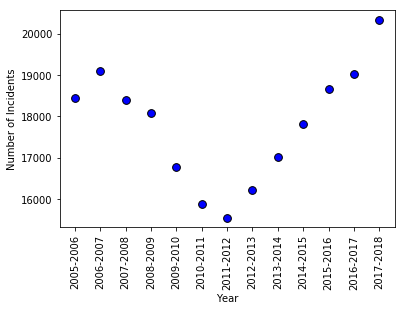

RAPE


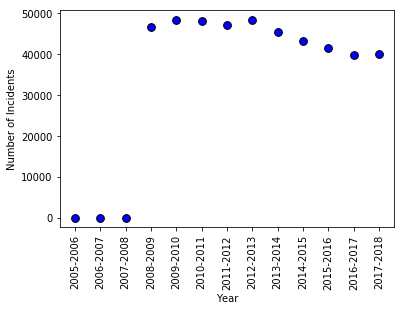

ROBBERY AT NON-RESIDENTIAL PREMISES


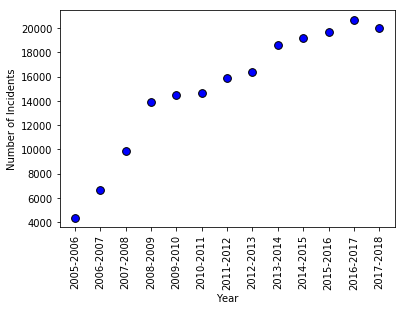

ROBBERY AT RESIDENTIAL PREMISES


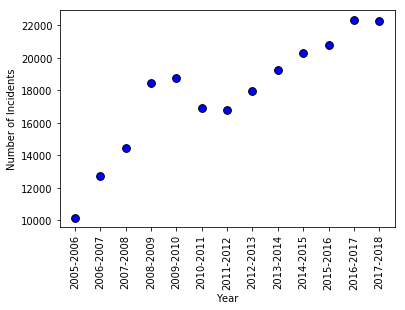

ROBBERY WITH AGGRAVATING CIRCUMSTANCES


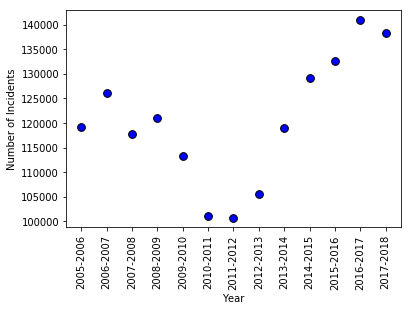

SEXUAL ASSAULT


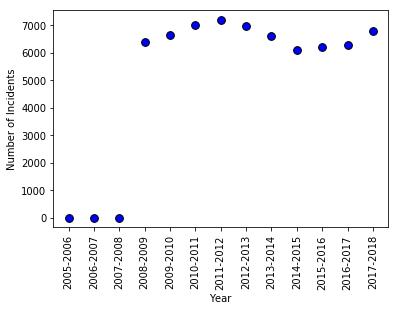

SEXUAL OFFENCES DETECTED AS A RESULT OF POLICE ACTION


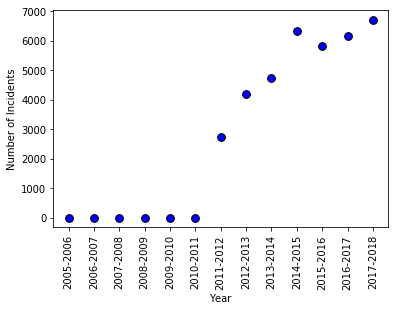

SHOPLIFTING


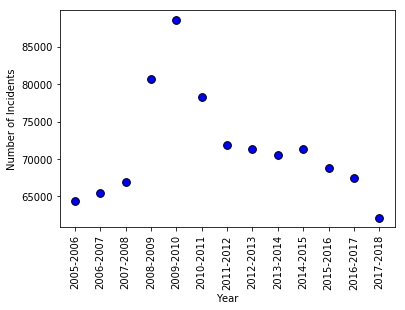

STOCK-THEFT


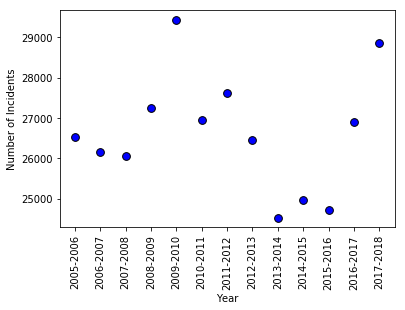

THEFT OF MOTOR VEHICLE AND MOTORCYCLE


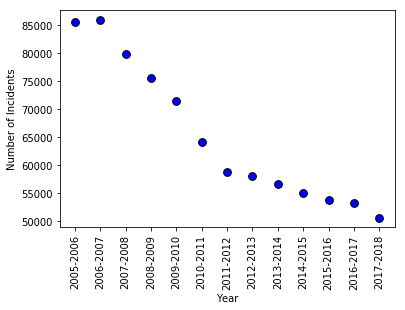

THEFT OUT OF OR FROM MOTOR VEHICLE


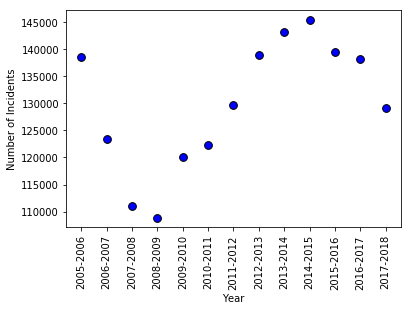

TRUCK HIJACKING


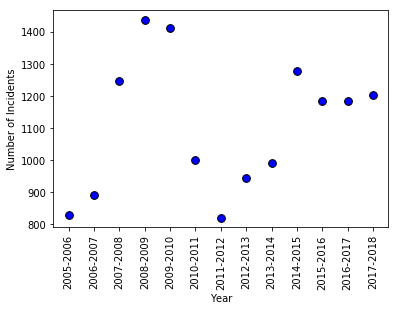

SEXUAL OFFENCES


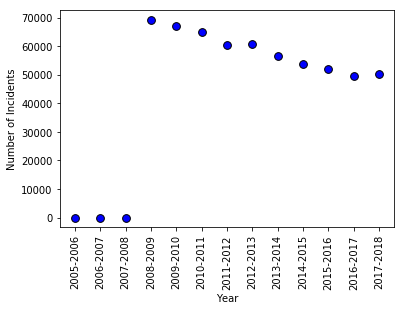

CONTACT CRIME


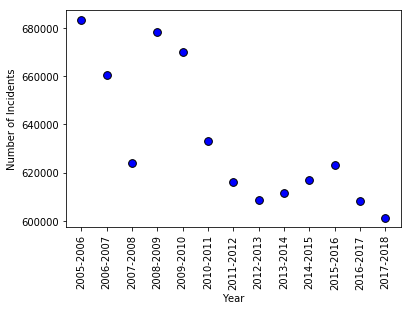

CONTACT RELATED CRIME


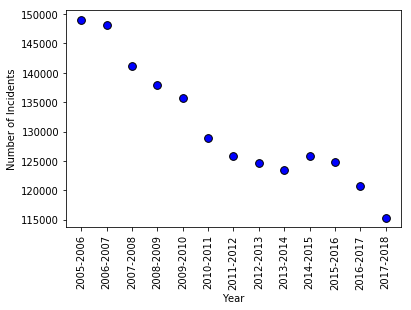

CRIMES DETECTED AS A RESULT OF POLICE ACTION


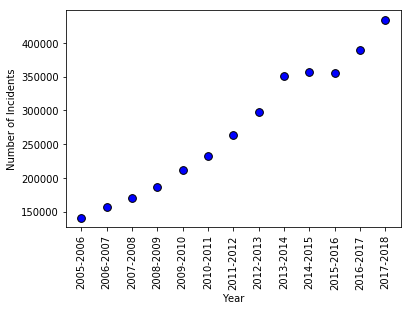

OTHER SERIOUS CRIMES


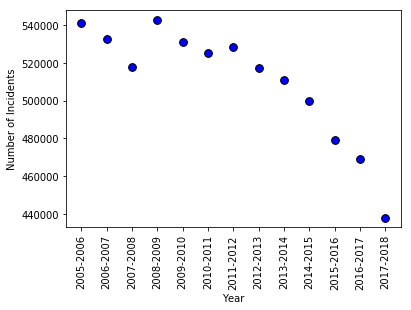

PROPERTY RELATED CRIME


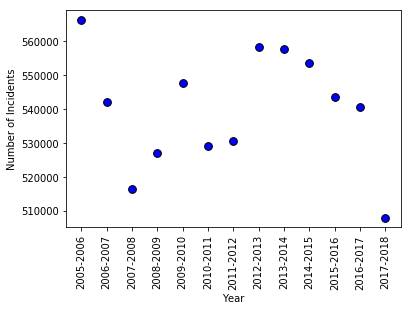

TRIO CRIMES


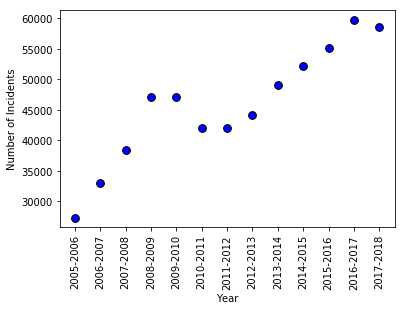

17 COMMUNITY REPORTED SERIOUS CRIMES


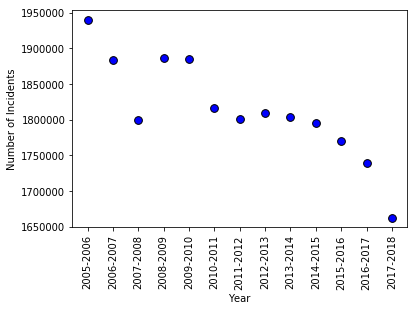

BANK ROBBERY


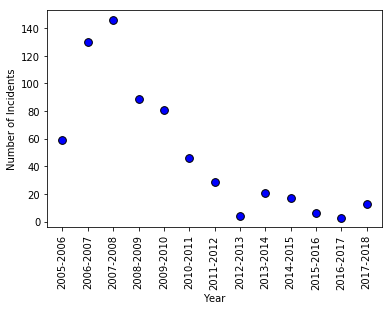

ROBBERY OF CASH IN TRANSIT


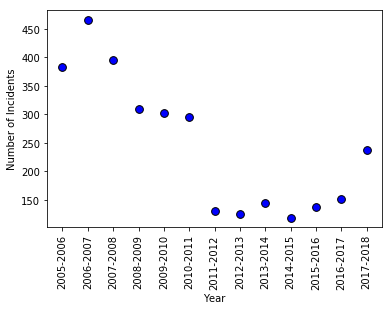

In [89]:
plt.rcParams['figure.figsize'] = 6,4
for i in Crimes:
    height = []
    x = []
    for j in Years:
        y = CrimeByStation['INCIDENTS'].where((CrimeByStation['CRIME'] == i) & (CrimeByStation['YEAR'] == j)).sum()
        height.append(y)
        x.append(j)
    plt.scatter(x = x, y = height, s = 60, c = 'blue', edgecolors = 'black')
    plt.xticks(rotation = 90)
    plt.xlabel('Year', fontsize = 10)
    plt.ylabel('Number of Incidents', fontsize = 10)
    plt.title(print(i))
    plt.show()
    
        

In [90]:
#Repeat of above but specifying which Provincial data to explore
Province = input('Enter a Province: ')


Enter a Province: western cape


WESTERN CAPE
ALL THEFT NOT MENTIONED ELSEWHERE


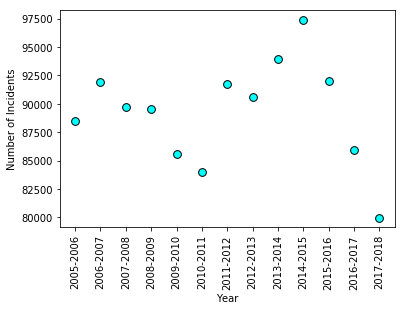

ARSON


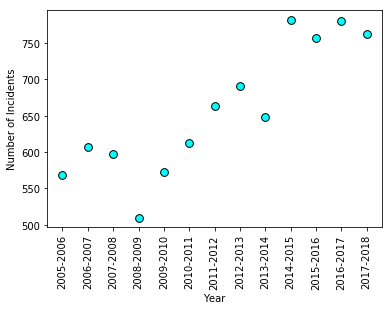

ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BODILY HARM


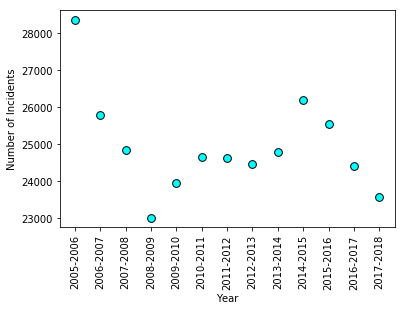

ATTEMPTED MURDER


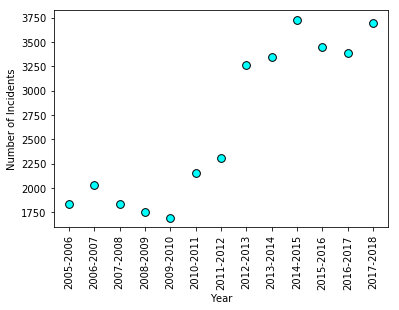

ATTEMPTED SEXUAL OFFENCES


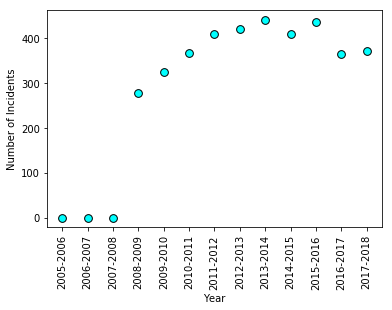

BURGLARY AT NON-RESIDENTIAL PREMISES


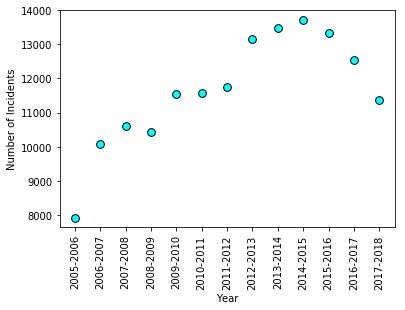

BURGLARY AT RESIDENTIAL PREMISES


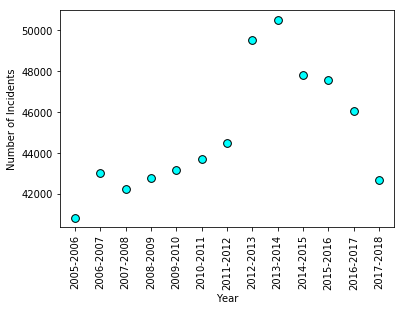

CARJACKING


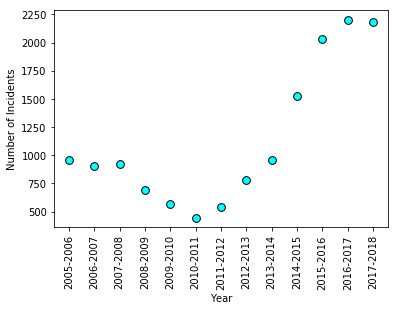

COMMERCIAL CRIME


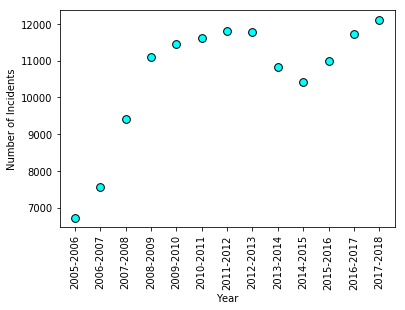

COMMON ASSAULT


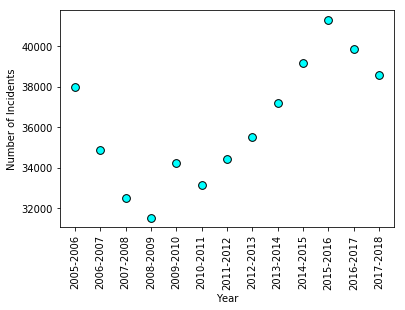

COMMON ROBBERY


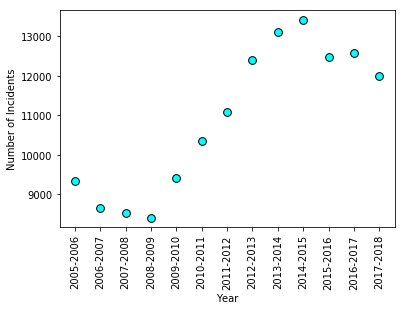

CONTACT SEXUAL OFFENCES


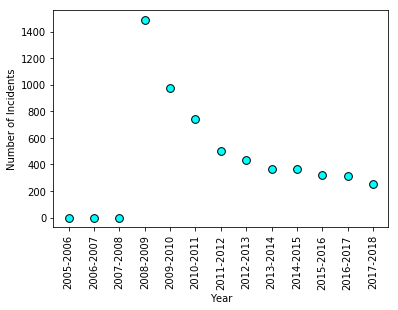

DRIVING UNDER THE INFLUENCE OF ALCOHOL OR DRUGS


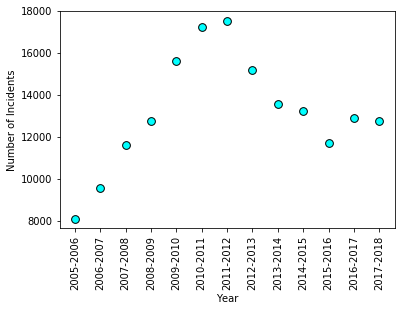

DRUG-RELATED CRIME


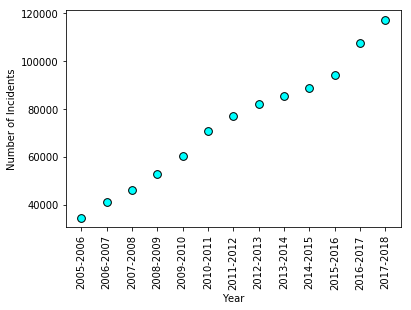

ILLEGAL POSSESSION OF FIREARMS AND AMMUNITION


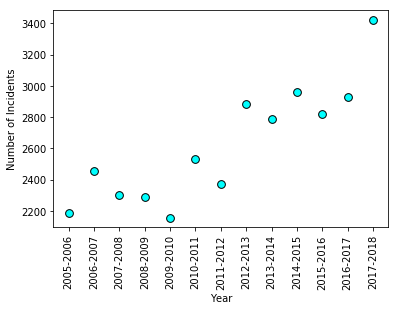

MALICIOUS DAMAGE TO PROPERTY


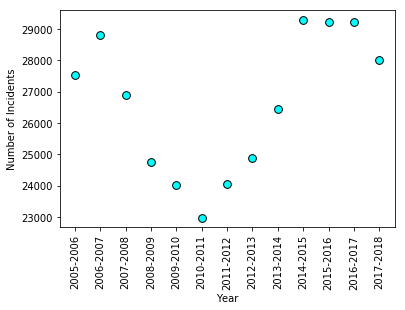

MURDER


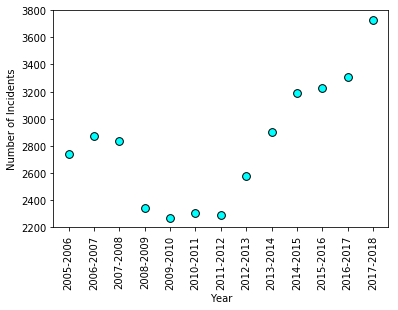

RAPE


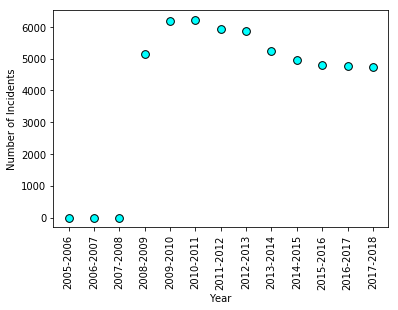

ROBBERY AT NON-RESIDENTIAL PREMISES


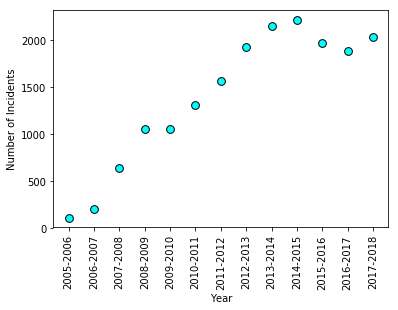

ROBBERY AT RESIDENTIAL PREMISES


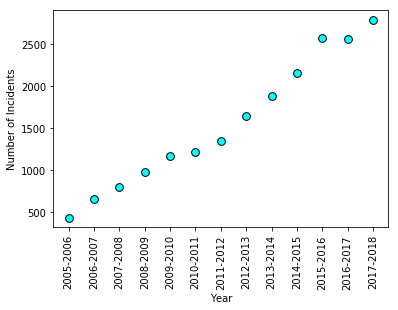

ROBBERY WITH AGGRAVATING CIRCUMSTANCES


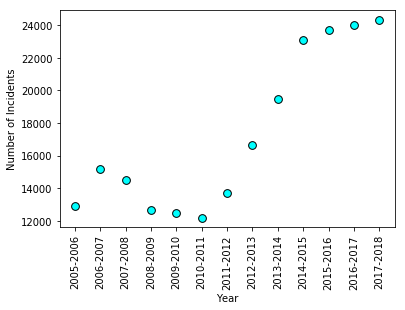

SEXUAL ASSAULT


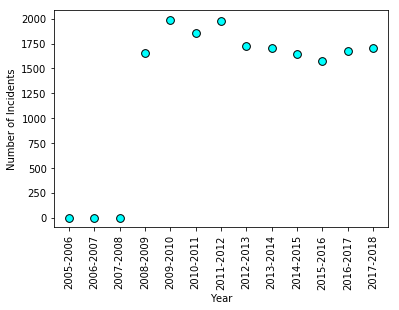

SEXUAL OFFENCES DETECTED AS A RESULT OF POLICE ACTION


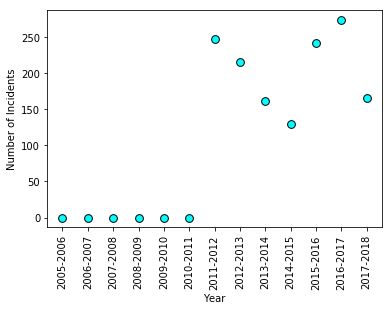

SHOPLIFTING


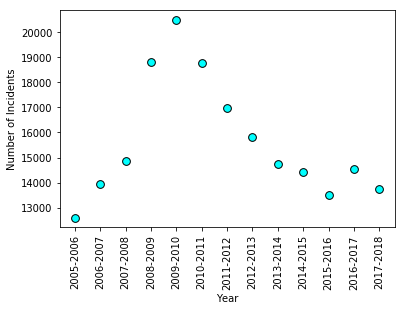

STOCK-THEFT


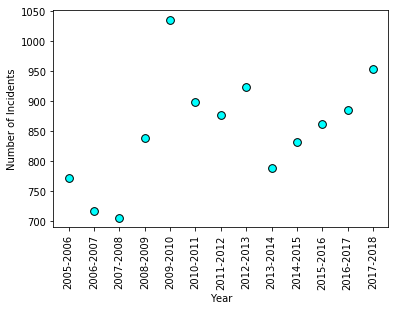

THEFT OF MOTOR VEHICLE AND MOTORCYCLE


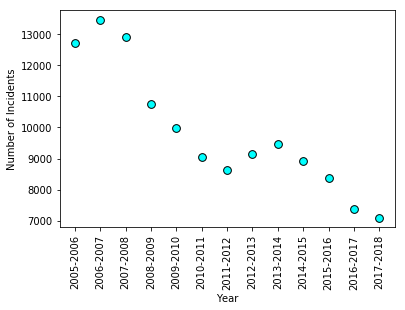

THEFT OUT OF OR FROM MOTOR VEHICLE


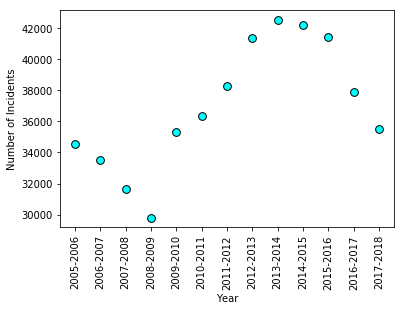

TRUCK HIJACKING


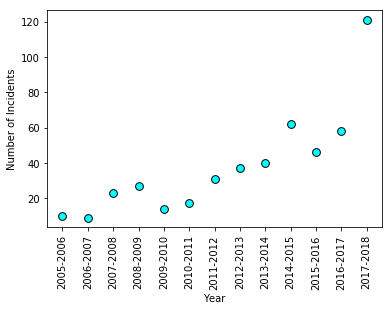

SEXUAL OFFENCES


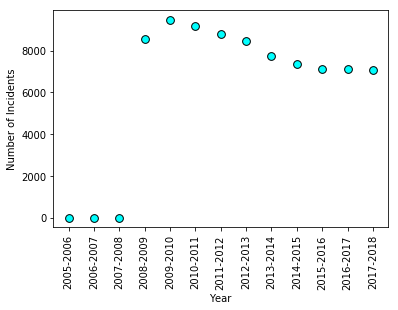

CONTACT CRIME


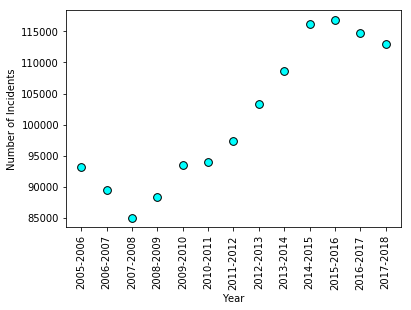

CONTACT RELATED CRIME


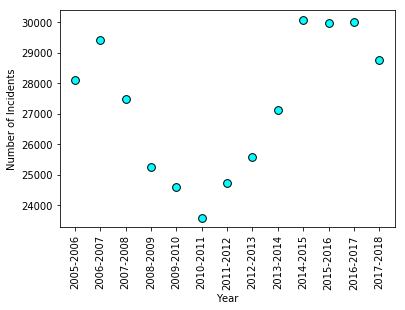

CRIMES DETECTED AS A RESULT OF POLICE ACTION


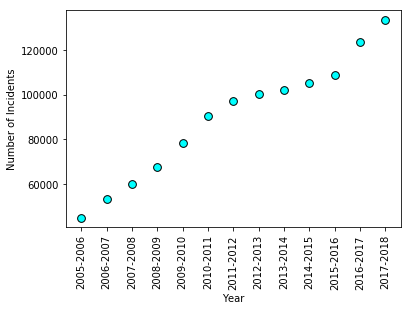

OTHER SERIOUS CRIMES


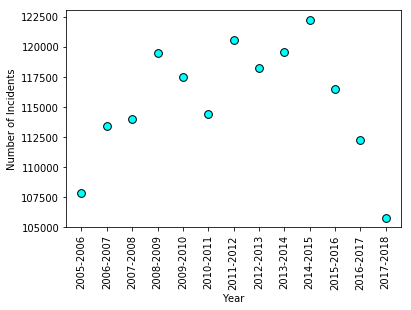

PROPERTY RELATED CRIME


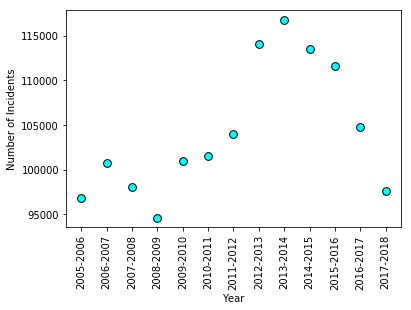

TRIO CRIMES


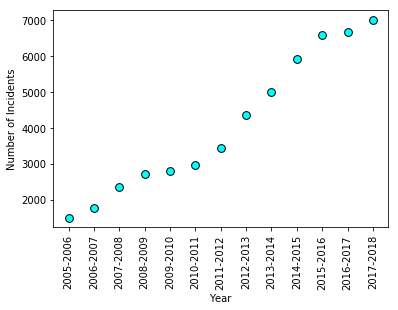

17 COMMUNITY REPORTED SERIOUS CRIMES


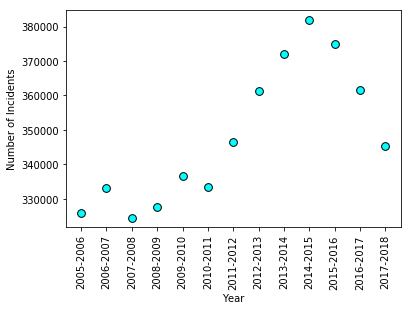

BANK ROBBERY


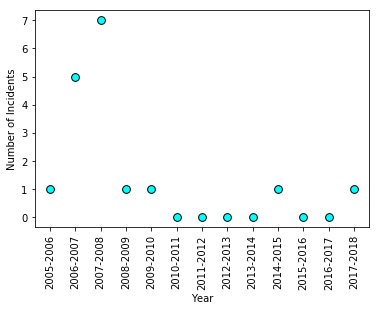

ROBBERY OF CASH IN TRANSIT


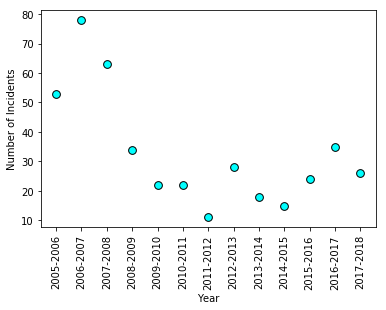

In [91]:
Province = str.upper(Province)
plt.rcParams['figure.figsize'] = 6,4
plt.title(print(Province))
for i in Crimes:
    height = []
    x = []
    for j in Years:
        y = CrimeByStation['INCIDENTS'].where((CrimeByStation['CRIME'] == i) & (CrimeByStation['YEAR'] == j) & (CrimeByStation['PROVINCE'] == Province)).sum()
        height.append(y)
        x.append(j)
    plt.scatter(x = x, y = height, s = 60, c = 'cyan', edgecolors = 'black')
    plt.xticks(rotation = 90)
    plt.xlabel('Year', fontsize = 10)
    plt.ylabel('Number of Incidents', fontsize = 10)
    plt.title(print(i))
    plt.show()

In [103]:
len(x)

13

In [110]:
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13]).reshape((-1, 1))
y = np.array(height)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, y)

slope = regressor.coef_
r_sq = regressor.score(X, y)

print('slope:', slope[0])
print('coefficient of determination:', r_sq)

slope: -3.252747252747252
coefficient of determination: 0.40454335580386014


In [120]:
#Using simple linear regression to evaluate general trends in the data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
Crime_Type = []
LM_Slope = []
LM_Coeff = []

print(Province)
for i in Crimes:
    height = []
    x = []
    k = 0
    for j in Years:
        y = CrimeByStation['INCIDENTS'].where((CrimeByStation['CRIME'] == i) & (CrimeByStation['YEAR'] == j) & (CrimeByStation['PROVINCE'] == Province)).sum()
        height.append(y)
        k = k + 1
        x.append(k)
        
    X = np.array(x).reshape((-1, 1))
    y = np.array(height).reshape((-1, 1))

    #Number of incidents has been normalized due to great variation in number and range between different crime types
    sc_y = StandardScaler().fit_transform(y)
        
    regressor = LinearRegression().fit(X, sc_y)

    slope = regressor.coef_
    r_sq = regressor.score(X, sc_y)

    #print(sc_y)
    Crime_Type.append(i)
    LM_Slope.append(slope[0][0])
    LM_Coeff.append(r_sq)
Stats = pd.DataFrame({'Crime_Type':Crime_Type, 'LM_Slope':LM_Slope, 'LM_Coeff':LM_Coeff})
Stats.head()


WESTERN CAPE


,Crime_Type,LM_Slope,LM_Coeff
0,ALL THEFT NOT MENTIONED ELSEWHERE,-0.031117,0.013556
1,ARSON,0.235417,0.775899
2,ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...,-0.093149,0.121475
3,ATTEMPTED MURDER,0.242073,0.820392
4,ATTEMPTED SEXUAL OFFENCES,0.213747,0.639631


In [126]:
#Retreiving a list of crime types that have increased
Stats['Crime_Type'].where(Stats['LM_Slope'] > 0).dropna()

1                                                 ARSON
3                                      ATTEMPTED MURDER
4                             ATTEMPTED SEXUAL OFFENCES
5                  BURGLARY AT NON-RESIDENTIAL PREMISES
6                      BURGLARY AT RESIDENTIAL PREMISES
7                                            CARJACKING
8                                      COMMERCIAL CRIME
9                                        COMMON ASSAULT
10                                       COMMON ROBBERY
12      DRIVING UNDER THE INFLUENCE OF ALCOHOL OR DRUGS
13                                   DRUG-RELATED CRIME
14        ILLEGAL POSSESSION OF FIREARMS AND AMMUNITION
15                         MALICIOUS DAMAGE TO PROPERTY
16                                               MURDER
17                                                 RAPE
18                  ROBBERY AT NON-RESIDENTIAL PREMISES
19                      ROBBERY AT RESIDENTIAL PREMISES
20               ROBBERY WITH AGGRAVATING CIRCUM

In [127]:
#Retreiving a list of crime types that have decreased
Stats['Crime_Type'].where(Stats['LM_Slope'] < 0).dropna()

0                     ALL THEFT NOT MENTIONED ELSEWHERE
2     ASSAULT WITH THE INTENT TO INFLICT GRIEVOUS BO...
11                              CONTACT SEXUAL OFFENCES
23                                          SHOPLIFTING
25                THEFT OF MOTOR VEHICLE AND MOTORCYCLE
36                                         BANK ROBBERY
37                           ROBBERY OF CASH IN TRANSIT
Name: Crime_Type, dtype: object

In [129]:
#Crime Type that has showed the highest relative increase
Stats['Crime_Type'].where(Stats['LM_Slope'] > 0).dropna().max()

'TRUCK HIJACKING'

In [131]:
#Crime Type that has showed the highest relative decrease
Stats['Crime_Type'].where(Stats['LM_Slope'] < 0).dropna().max()

'THEFT OF MOTOR VEHICLE AND MOTORCYCLE'

In [132]:
#Crime Type that has showed the lowest relative increase
Stats['Crime_Type'].where(Stats['LM_Slope'] > 0).dropna().min()

'17 COMMUNITY REPORTED SERIOUS CRIMES'

In [133]:
#Crime Type that has showed the lowest relative decrease
Stats['Crime_Type'].where(Stats['LM_Slope'] < 0).dropna().min()

'ALL THEFT NOT MENTIONED ELSEWHERE'

In [163]:
#Crime type that has showed the most consistent increase year after year
Stats1 = Stats[['Crime_Type', 'LM_Coeff']].where(Stats['LM_Slope'] > 0).dropna()
Stats1['Crime_Type'].loc[Stats1['LM_Coeff'].idxmax()]

'DRUG-RELATED CRIME'

In [164]:
#Crime type that has showed the most consistent decrease year after year
Stats2 = Stats[['Crime_Type', 'LM_Coeff']].where(Stats['LM_Slope'] < 0).dropna()
Stats2['Crime_Type'].loc[Stats2['LM_Coeff'].idxmax()]

'THEFT OF MOTOR VEHICLE AND MOTORCYCLE'